In [1]:
import glob
all_names = glob.glob('po_logs/po_baseline3*_*')
import pickle
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [12]:
ls

aaa                              po_beseline123.sh
a.sh                             po_beseline1.py
baseline.py                      po_beseline2.py
-f                               po_beseline3.py
gated_curio_dqn_noa_baseline.py  po_codes/
gated_curio_dqn_noa_forward.py   po_forward123.sh
gated_curio_dqn_noa.py           po_forward1.py
gpu0.sh                          po_forward2.py
gpu1.sh                          po_forward3.py
gpu3.sh                          po_gate123.sh
gpu_gate1.py                     po_gate12.sh
gpu_gated_curio_dqn_noa.py       po_gate1.py
gpu_gc_simple.py                 po_gate2.py
gpu_logs/                        po_gate3.py
gpu_simple1.py                   po_gate_mindel2.py
gpu_simple2.py                   po_gate_mindel3.py
gpu_simple3.py                   po_logs/
hard_cartpole.ipynb              po_logs_easy/
hard_cartpole.py                 po_rew.pickle
health_check_tool.ipynb          __pycache__/
logs/                            summary_for_poster

In [8]:
ls po_logs/

po_baseline1/
po_baseline1_1000_std10.pickle
po_baseline1_100_std10.pickle
po_baseline1_1100_std10.pickle
po_baseline1_1200_std10.pickle
po_baseline1_1249_std10.pickle
po_baseline1_200_std10.pickle
po_baseline1_300_std10.pickle
po_baseline1_400_std10.pickle
po_baseline1_500_std10.pickle
po_baseline1_600_std10.pickle
po_baseline1_700_std10.pickle
po_baseline1_800_std10.pickle
po_baseline1_900_std10.pickle
po_baseline2/
po_baseline2_1000_std10.pickle
po_baseline2_100_std10.pickle
po_baseline2_1100_std10.pickle
po_baseline2_1200_std10.pickle
po_baseline2_1249_std10.pickle
po_baseline2_200_std10.pickle
po_baseline2_300_std10.pickle
po_baseline2_400_std10.pickle
po_baseline2_500_std10.pickle
po_baseline2_600_std10.pickle
po_baseline2_700_std10.pickle
po_baseline2_800_std10.pickle
po_baseline2_900_std10.pickle
po_baseline3/
po_baseline3_1000_std10.pickle
po_baseline3_100_std10.pickle
po_baseline3_1100_std10.pickle
po_baseline3_1200_std10.pickle
po_baseline3_1249_std10.pickle
po_baseline3_200

In [2]:
data = {"qt+i_r":[],
       'reward':[],
       "loss":[],
       "loss_a":[]}
for j,an in enumerate(all_names):
    print(j,len(all_names))
    with open(an,mode='rb') as f:
        tmp = pickle.load(f)
        data["qt+i_r"] += [d for i, d in enumerate(tmp["qt+i_r"]) if i%100==0]
        data['reward'] += [d for i, d in enumerate(tmp['reward'])]
        data["loss"] += [d for i, d in enumerate(tmp["loss"]) if i%100==0]
        data["loss_a"] += [d for i, d in enumerate(tmp["loss_a"]) if i%100==0]

0 13


/home/lab/shigeharu/.virtualenvs/py3/lib/python3.5/site-packages/chainer/training/extensions/plot_report.py:16: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/lab/shigeharu/.virtualenvs/py3/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/lab/shigeharu/.virtualenvs/py3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/lab/shigeharu/.virtualenvs/py3/lib/python3.5/site-packages/ipy

1 13
2 13
3 13
4 13
5 13
6 13
7 13
8 13
9 13
10 13
11 13
12 13


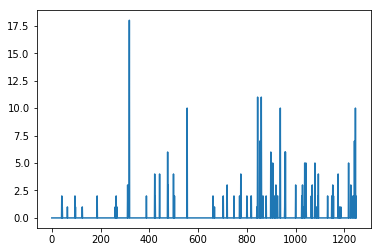

In [3]:
plt.plot(list(range(len(data['reward']))), data['reward'])

In [71]:
rews = list((data['reward']))
mean_rews10 = [sum(rews[i:i+10])/10 for i in range(len(rews)-10)]

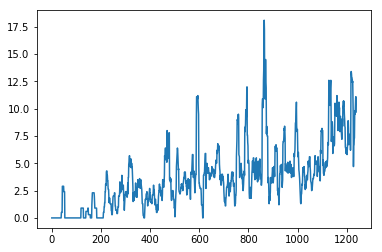

In [72]:
plt.plot(range(len(mean_rews10)), mean_rews10)

In [73]:
data3 = data['reward']

In [67]:
data2 = data['reward']

In [61]:
data1 = data['reward']

In [23]:
np.array().shape

(1249,)

In [24]:
records = {}

In [74]:
records['baseline'] = np.array([data1,data2,data3])

In [48]:
records['forwards'] = np.array([data1,data2,data3])

In [27]:
records['baseline'] = np.array([data1,data2,data3])

{'gates': array([[ 0.,  0.,  0., ...,  9.,  0., 10.],
        [ 0.,  0.,  0., ...,  4.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  7.,  5.]])}

In [81]:
records['baseline'].T.mean(axis=1)

array([ 0.        ,  0.        ,  0.        , ...,  5.66666667,
        2.33333333, 15.66666667])

In [83]:
import pickle
with open('po_rew_hard.pickle',mode='wb') as f:
    pickle.dump(records,f)

In [89]:
mean = {}
std_up = {}
std_down = {}
records_mean = {}

In [105]:
records_mean = {}

In [106]:
# 10 移動平均線にする

In [125]:
for k in records.keys():
    records_mean[k] = np.array([[sum(rews[i:i+20])/20 for i in range(len(rews)-20)] for rews in records[k]])
    mean[k] = records_mean[k].T.mean(axis=1)
    mean[k] = mean[k][:980]
    std_up[k] = records_mean[k].T.mean(axis=1)+records_mean[k].T.std(axis=1)
    std_up[k] = std_up[k][:980]
    std_down[k] = records_mean[k].T.mean(axis=1)-records_mean[k].T.std(axis=1)
    std_down[k] = std_down[k][:980]

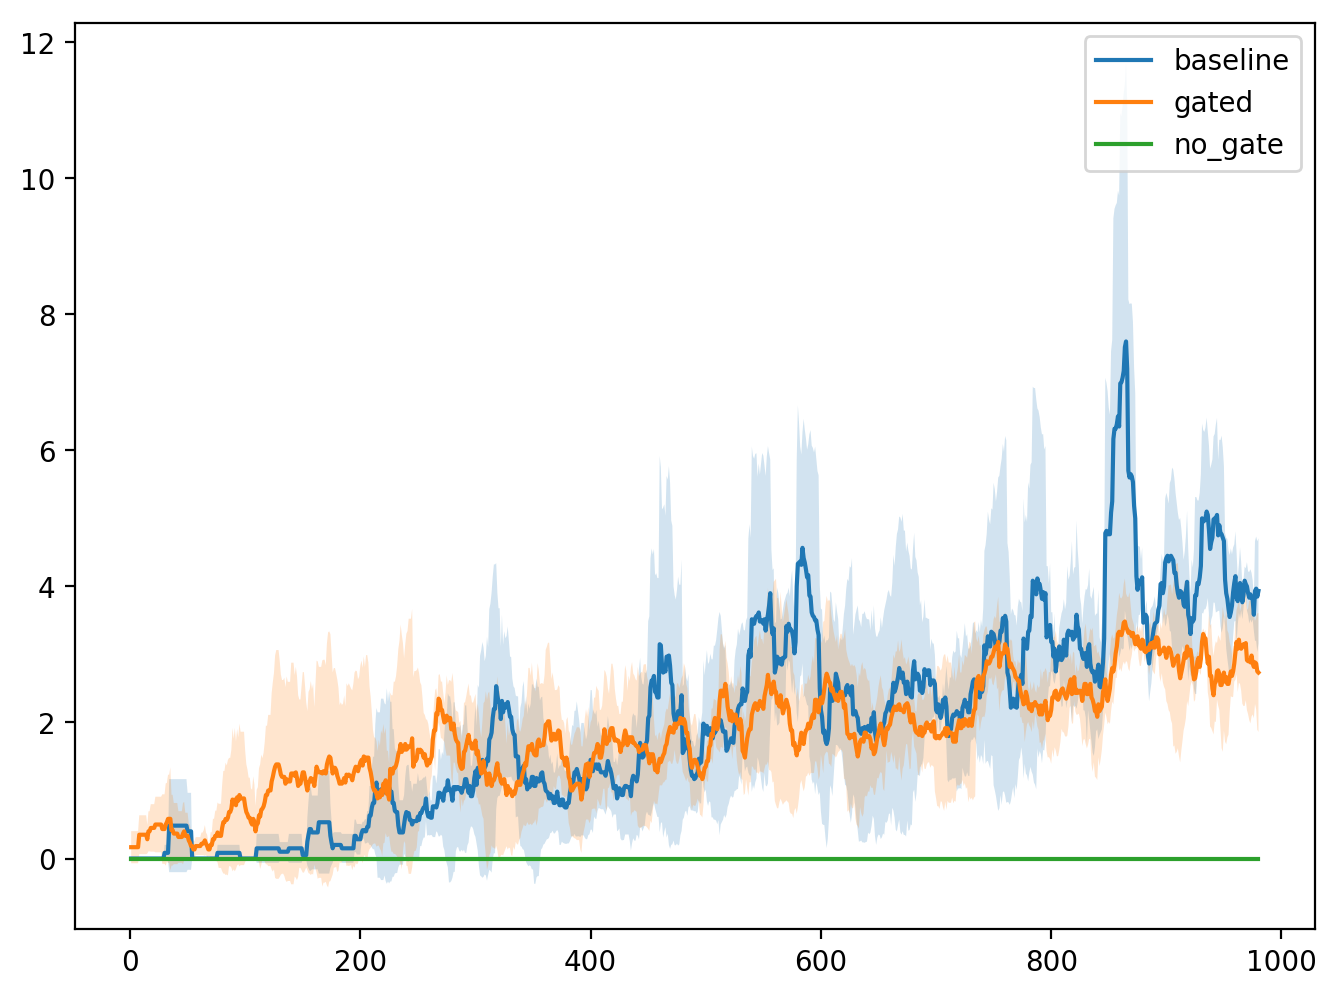

In [127]:
plt.figure(figsize=(8,6),dpi=200)
for lab,k in zip(['baseline','gated','no_gate'],records.keys()):
    plt.fill_between([i+1 for i in range(len(mean[k]))], std_up[k], std_down[k],alpha=0.2)
    plt.plot([i+1 for i in range(len(mean[k]))],mean[k],label=lab)
plt.legend()

In [102]:
std_up[k]

array([0., 0., 0., ..., 0., 0., 0.])

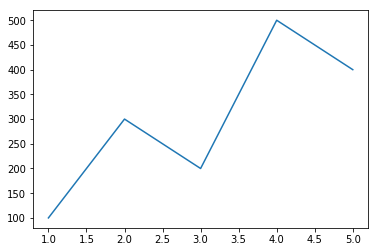

In [91]:
# 直線引きたい時
import numpy as np
import matplotlib.pyplot as plt

# 折れ線グラフを出力
left = np.array([1, 2, 3, 4, 5])
height = np.array([100, 300, 200, 500, 400])
plt.plot(left, height)

In [ ]:
plt.fill_between(x, y1, y2)